In [ ]:
 !pip uninstall tensorflow
 !pip install tensorflow==2.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.
flax 0.6.8 requires jax>=0.4.2, but you have jax 0.3.25 which is incompatible.
chex 0.1.7 requires jax>=0.4.6, but you have jax 0.3.25 which is incompatible.


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np 
np.random.seed(6)
import random
random.seed(6)
# from keras import backend as K
from tensorflow.random import set_seed
set_seed(6)
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set(style="whitegrid")
import warnings 
from sklearn.svm import SVC, NuSVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from scipy import stats
from scipy.stats import uniform, randint
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score
# from tflearn.data_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import interp
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from keras.utils import to_categorical
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam


### Utility Functions

In [2]:
Renamed_feature= []               
all_clf_res=[]                    
random_initializer=20            
n_dots=50


for i in range(8):
  Renamed_feature.append('F'+str(i+1)) 

def Manual (data):

    max_Pregnancies = data.F1.max()                         
    data = data[data.F1!=max_Pregnancies]                   
    max_Glucose = data.F2.max()                              
    data = data[data.F2!=max_Glucose]                       
    for i in range(4):                                      
      min_Glucose = data.F2.min()                          
      data = data[data.F2!=min_Glucose]                    
    max_BloodPressure = data.F3.max()                      
    data = data[data.F3!=max_BloodPressure]                
    for i in range(2):                                        
      max_skinthickness = data.F4.max() 
      data = data[data.F4!=max_skinthickness]
    for i in range(25):                                     
      max_Insulin = data.F5.max() 
      data = data[data.F5!=max_Insulin]
    max_bmi = data.F6.max()
    data = data[data.F6!=max_bmi]
    for i in range(4):                                       
      min_bmi = data.F6.min() 
      data = data[data.F6!=min_bmi]
    for i in range(20):                                      
      max_DiabetesPedigreeF = data.F7.max()
      data = data[data.F7!=max_DiabetesPedigreeF]
    for i in range(20):                                      
      max_age = data.F8.max() 
      data = data[data.F8!=max_age]
      df =data
    return data

def IQR_Mean (data):

  for i in range(8): 
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)                                  
    Q3 = x.quantile(0.75)                                  
    IQR = Q3-Q1                                             
    mean = x.mean()                                        
    for j in range(569):                                  
      temp = x[j]                                          
      LW = (Q1 - 1.5 * IQR)                               
      UW = (Q3 + 1.5 * IQR)                                 
      if temp < LW:                                         
        x[j] = mean
      if temp > UW:                                        
        x[j] = mean
    data[Renamed_feature[i]] = x
  return data

def IQR_Median (data): 
  for i in range(8):
    x = data[Renamed_feature[i]]
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    median = x.quantile(0.5)                               
    for j in range(569):                                   
      temp = x[j]
      LW = (Q1 - 1.5 * IQR)
      UW = (Q3 + 1.5 * IQR)
      if temp < LW:                                        
        x[j] = median
      if temp > UW:
        x[j] = median                                      
    data[Renamed_feature[i]] = x
  return data

def IQR (data):
  for i in range(8):                                        
    Q1 = data[Renamed_feature[i]].quantile(0.25)
    Q3 = data[Renamed_feature[i]].quantile(0.75)
    IQR = Q3-Q1                                             
    LW = (Q1 - 1.5 * IQR)                                   
    UW = (Q3 + 1.5 * IQR)                                  
    data = data[data[Renamed_feature[i]]<UW]               
    data = data[data[Renamed_feature[i]]>LW]               

  return data

def outlier_Rejection (data, iqr_Mean, iqr_Medain, iqr, manual):
  if iqr_Mean == True:                                   
    data = IQR_Mean (data)
  if iqr_Medain == True:                                  
    data = IQR_Medain (data)
  if iqr == True:                                        
    data = IQR (data)
  if manual == True:                                      
    data = Manual (data)

  return data

def replace_zero(data, field, target):
    
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]

def metrics (y_true, y_pred, probas_):

  points=n_dots*'-'
  print(points)
  fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  print("Detailed classification report for current fold:")
  print()
  print(classification_report(y_true, y_pred))
  print()
  print("Area Under ROC (AUC): {}".format(roc_auc))
  print()
  print('Confusion Matrix for current fold: ')
  print(confusion_matrix(y_true, y_pred))
  print()
  print("Accuracy for Current Fold: {}".format(accuracy_score(y_true, y_pred)))
  print()
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

  return  tn, fp, fn, tp, roc_auc, fpr, tpr


def average_ROC(mean_fpr,tprs,aucs,TP,TN,FP,FN):

  sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
  spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = np.mean(aucs)
  std_auc = np.std(aucs)
  ax = plt.axes()
  ax.grid(color='lightgray', linestyle='-', linewidth=.5)
  ax.set_facecolor("white")
  
  ax.spines['bottom'].set_color('#000000')
  ax.spines['top'].set_color('#000000') 
  ax.spines['right'].set_color('#000000')
  ax.spines['left'].set_color('#000000')

  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  
  plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
  plt.scatter(0, sen, s=80, c='r', marker='x',)
  plt.scatter((1-spe),0, s=80, c='r', marker='x',)
  plt.axhline(y=sen, color='r', linestyle='--')
  plt.axvline(x=(1-spe), color='r', linestyle='--')
  plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
  plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                  label=r'$\pm$ 1 Standard deviation')

  plt.xticks(np.arange(0.0, 1.01, step=0.1))
  plt.yticks(np.arange(0.0, 1.01, step=0.1))
  left=0.0
  right=1.0
  plt.xlim(left, right)
  plt.ylim(left, right)
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.legend(loc="lower right")
  plt.show()
def plot_Current_ROC(fpr,tpr,iterator,roc_auc):

  plt.plot(fpr,
          
          tpr,
          alpha=0.35,
          linewidth=1)
def creat_Model (classifier, X_Train, Y_Train, tuned_parameters, verbose):

  clf = GridSearchCV(classifier,
                    tuned_parameters,
                    verbose=verbose,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)
  clf.fit(X_Train, Y_Train)
  return clf

def average_performance(aucs,Accuracy,TP,TN,FP,FN): 

  print()
  n_dotsav=(n_dots-len('Average'))//2
    
  print('-'*n_dotsav+'Average'+'-'*n_dotsav)
  print("AUC (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(aucs),np.std(aucs)))
  print("Accuracy (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(Accuracy),np.std(Accuracy)))
  cm = [[int(np.mean(TP)), int(np.mean(FP))],[int(np.mean(FN)), int(np.mean(TN))]]
  print ('Avg. CM is '+str(cm))
  cm = [[int(np.sum(TP)), int(np.sum(FP))],[int(np.sum(FN)), int(np.sum(TN))]]
  print ('Total for all folds CM is '+str(cm))
  re_auc=str(round(np.mean(aucs), 3))+'+/-'+str(round(np.std(aucs),3))
  all_clf_res.append(re_auc)
    
def feature_Selector(data, algo, n_feature):

    if algo=='PCA':                                                   
        X_Data= data.iloc[:,:8].values
        pca = PCA(n_components=n_feature)                            
        X_Data = pca.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values

    if algo == 'ICA':
        X_Data= data.iloc[:,:8].values
        ICA = FastICA(n_components=n_feature, random_state=12) 
        X_Data = ICA.fit_transform(X_Data)
        return X_Data , data.iloc[:,8:].values
    
    if algo =='corr':                                                  
        if n_feature ==4:
            data = data[['F2','F5','F4','F6','Outcome']]               
            return data.iloc[:,:4].values, data.iloc[:,4:].values
        if n_feature ==6:
            data = data[['F1','F2','F4','F5','F6','F8','Outcome']]      
            return data.iloc[:,:6].values, data.iloc[:,6:].values
        
    if algo == 'None':
        return data.iloc[:,:8].values, data.iloc[:,8:].values            
    
    

def nn_opt(activation,dropout_rate,init,learn_rate):

    neuron1,neuron2,neuron3,neuron4,neuron5=64,16,64,64,64
    model = Sequential()
    np.random.seed(6)
    model.add(Dense(neuron1, input_dim =4 , kernel_initializer= init, activation= activation))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= init, activation= activation))
    model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= init, activation= activation))
    model.add(Dense(neuron4, input_dim = neuron3, kernel_initializer= init, activation= activation))
    model.add(Dense(neuron5, input_dim = neuron4, kernel_initializer= init, activation= activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))
    
    optimizer = Adam(lr = learn_rate)              
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model     


    

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dia.csv to Dia.csv


In [4]:
data=pd.read_csv("Dia.csv")

In [5]:
data.head(n=6)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,Unnamed: 4,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,NaN,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,NaN,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,NaN,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,NaN,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,NaN,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,NaN,9,253,19.724160,0.103424,26,0


In [6]:
data = data.drop('Unnamed: 4', axis=1)
data = data.drop('PatientID', axis=1)
data

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
14890,10,65,60,46,177,33.512468,0.148327,41,1
14891,2,73,66,27,168,30.132636,0.862252,38,1
14892,0,93,89,43,57,18.690683,0.427049,24,0
14893,0,132,98,18,161,19.791645,0.302257,23,0


In [7]:
data = pd.DataFrame({'F1':data.iloc[:,:8].values[:,0],
                     'F2':data.iloc[:,:8].values[:,1],
                     'F3':data.iloc[:,:8].values[:,2],
                     'F4':data.iloc[:,:8].values[:,3],
                     'F5':data.iloc[:,:8].values[:,4],
                     'F6':data.iloc[:,:8].values[:,5],
                     'F7':data.iloc[:,:8].values[:,6],
                     'F8':data.iloc[:,:8].values[:,7],
                     'Outcome':data.iloc[:,8:].values[:,0]})

### Show the statistical description of the data which sumarize the central tendency, dispersion, and shape of a data distribution.



In [8]:
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,Outcome
count,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000
mean,3.224841,107.868278,71.238469,28.804162,137.957637,31.514957,0.398842,30.138234,0.333199
std,3.391987,32.002972,16.754499,14.555187,133.120086,9.759037,0.378169,12.089241,0.471373
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259603,0.137695,22.000000,0.000000
50%,2.000000,104.000000,72.000000,30.000000,83.000000,31.772471,0.200038,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.254649,0.615603,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


# Data Preprocessing  

In [9]:
print('Shape Before Process: ' + str(data.shape))

data = outlier_Rejection (data,
                  iqr_Mean=False,
                  iqr_Medain=False,
                  iqr=True,
                  manual=False)
print('Shape After outlier Removed: ' + str(data.shape))

for col in ['F2', 'F3', 'F4', 'F5', 'F6']:   
    replace_zero(data, col, 'Outcome')              
print('Shape After Filling Missing Value: ' + str(data.shape))
     
                        
X_Data,Y_Lavel = feature_Selector(data, algo='corr', n_feature=4)    
print('Shape After Feature Selection: ' + str(X_Data.shape))    

kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=random_initializer)

Shape Before Process: (14895, 9)
Shape After outlier Removed: (12562, 9)
Shape After Filling Missing Value: (12562, 9)
Shape After Feature Selection: (12562, 4)


### MLP Experiment Block


In [10]:

seed = 6
np.random.seed(seed)
model = KerasClassifier(build_fn = nn_opt, verbose = 0)

batch_size = [8, 16, 32]            
epochs = [100, 150, 200]              
learn_rate =[0.001,.05, 0.1]         
dropout_rate = [0.0, 0.3, 0.6]       
activation = ['relu', 'tanh']   
init =['uniform', 'normal']         
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  learn_rate=learn_rate,
                  dropout_rate=dropout_rate,
                  activation=activation,
                  init=init)

grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)


relu 8 200 0.001 0.6 normal 64 16 64 64
------------------->>>>>>>>>>Fold no =  1
Epoch 1/200
1257/1257 [==============================] - 6s 4ms/step - loss: 0.5604 - accuracy: 0.7257
Epoch 2/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.5269 - accuracy: 0.7308
Epoch 3/200
1257/1257 [==============================] - 7s 6ms/step - loss: 0.5034 - accuracy: 0.7503
Epoch 4/200
1257/1257 [==============================] - 6s 5ms/step - loss: 0.4875 - accuracy: 0.7647
Epoch 5/200
1257/1257 [==============================] - 5s 4ms/step - loss: 0.4891 - accuracy: 0.7614
Epoch 6/200
1257/1257 [==============================] - 6s 4ms/step - loss: 0.4826 - accuracy: 0.7681
Epoch 7/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.4785 - accuracy: 0.7671
Epoch 8/200
1257/1257 [==============================] - 4s 3ms/step - loss: 0.4776 - accuracy: 0.7719
Epoch 9/200
1257/1257 [==============================] - 6s 5ms/step - loss: 0.4707 - accuracy

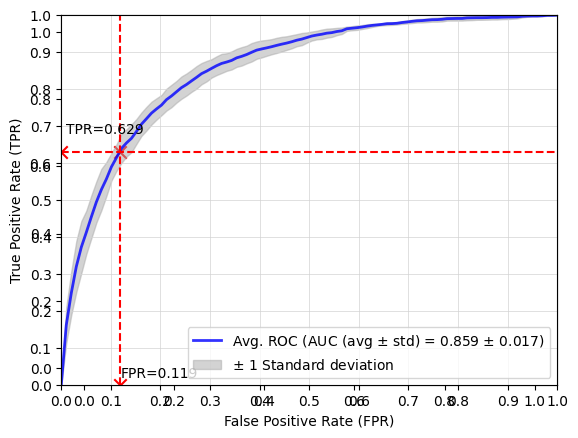


---------------------Average---------------------
AUC (Avg. +/- Std.) is  0.859 +/- 0.017
Accuracy (Avg. +/- Std.) is  0.812 +/- 0.013
Avg. CM is [[433, 217], [255, 1606]]
Total for all folds CM is [[2165, 1088], [1277, 8032]]
Sensitivity (Avg. +/- Std.) is  0.629 +/- 0.035
Specificity (Avg. +/- Std.) is  0.881 +/- 0.017
Precision (Avg. +/- Std.) is  0.667 +/- 0.030
FOR (Avg. +/- Std.) is  0.137 +/- 0.011
DOR (Avg. +/- Std.) is  12.889 +/- 2.246


In [11]:
i=0                                                                          
Accuracy = []                                                               
FP = []                                                                     
TN = []                                                                    
FN = []                                                                    
TP = []                                                                      
tprs = []                                                                   
aucs_ens = []                                                                
sn = []                                                                      
sp = []                                                                      
pr = []                                                                      
FOR = []                                                                     
DOR = [] 
iterator=0
mean_fpr = np.linspace(0, 1, 100)
activation="relu"
batch_size=8
epochs=200
learn_rate=.001
dropout_rate=0.6
init="normal"
neuron1,neuron2,neuron3,neuron4=64,16,64,64
print(activation,batch_size,epochs,learn_rate,dropout_rate,init,
    neuron1,neuron2,neuron3,neuron4)



for train_index, test_index in kf.split(X_Data,Y_Lavel):                 
  print('------------------->>>>>>>>>>Fold no = ',i+1)
  X_Train, X_Test = X_Data[train_index], X_Data[test_index]               
  Y_Train, Y_Test = Y_Lavel[train_index], Y_Lavel[test_index]           


  Y_Train_1Hot = to_categorical(Y_Train,2)                                
  Y_Test_1Hot = to_categorical(Y_Test,2)                                  

  model =nn_opt(activation,                                               
            dropout_rate,
            init,
            learn_rate)    
  np.random.seed(6)
  model.fit(x=X_Train,                                                     
            y=Y_Train_1Hot,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=False,
            verbose=1)
    
  probas_ = model.predict(X_Test)                                           

  y_pred = np.argmax(model.predict(X_Test), axis=1)                      


  tn, fp, fn, tp, roc_auc, fpr, tpr = metrics (y_true = Y_Test,           
                                              y_pred = y_pred,
                                              probas_ = probas_)
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  aucs_ens.append(roc_auc)
  plot_Current_ROC (fpr,tpr,iterator,roc_auc)                             
  iterator += 1
  TN.append(tn)
  FP.append(fp)
  FN.append(fn)
  TP.append(tp)
  Accuracy.append(accuracy_score(Y_Test, y_pred))
  sn.append(tp/(tp+fn))
  sp.append(tn/(fp+tn))
  pr.append(tp/(tp+fp))
  FOR.append(fn/(tn+fn))
  DOR.append((tp*tn)/(fp*fn))
  print((tp*tn)/(fp*fn))
  i+=1

average_ROC(mean_fpr,tprs,aucs_ens,TP,TN,FP,FN)                             
average_performance(aucs_ens,Accuracy,TP,TN,FP,FN)                            
print("Sensitivity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sn),np.std(sn)))
print("Specificity (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(sp),np.std(sp)))
print("Precision (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(pr),np.std(pr)))
print("FOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(FOR),np.std(FOR)))
print("DOR (Avg. +/- Std.) is  %0.3f +/- %0.3f" %(np.mean(DOR),np.std(DOR)))

In [ ]:
0